# Examples

In [1]:
%config InlineBackend.figure_format = "retina"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from bizplots import plot_quantiles, plot_spaghetti, plot_ribbons, handler_map
from bizplots.formatting import CurrencyFormatter

## Plot Quantiles

In [ ]:
#  Group labels are 0, 1, 2, 3, 4
#  and values are normaly distributed for each group,
#  with mean equal to the label value. 

labels = np.random.choice(5, size=1000)
values = np.random.normal(loc=labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_quantiles(labels, values, ax=axes[0], label='goodbye')
# Plot on the right shows the same info but to show the available features we:
#  1. Change the orientation to horizontal
#  2. We plot the values twice with labels slightly shifted.
#  3. We change the outer percentile to be the 75% (instead of the default 95%)
plot_quantiles(labels, values, pct_outer=75, ax=axes[1], color='C1', orientation='horizontal', label='hello')
plot_quantiles(labels + 0.2, values, alpha=1, ax=axes[1], color='C2', orientation='horizontal', label='hello + offset')

# Fancy legend by using the handler map:

axes[0].legend(handler_map=handler_map)
axes[1].legend(handler_map=handler_map)
plt.show()

## Plot spaguetti and ribbons

In [ ]:
rng = np.random.default_rng(42)
timesteps = np.linspace(0, 100, num=1000)
freqs = rng.normal(30, 3, size=2000)
sine_wave = np.sin(2 * np.pi * timesteps / freqs[:, None])
sine_wave *= np.exp(timesteps / 100) [None, :]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_spaghetti(timesteps, sine_wave, ax=axes[0], label='spaghetti')
plot_ribbons(timesteps, sine_wave, ax=axes[1], label='ribbons', color='k')
for ax in fig.axes:
    ax.axhline(0, linestyle=":", color='k', label='zero')
    ax.legend(handler_map=handler_map)
plt.show()

## Currency formatter

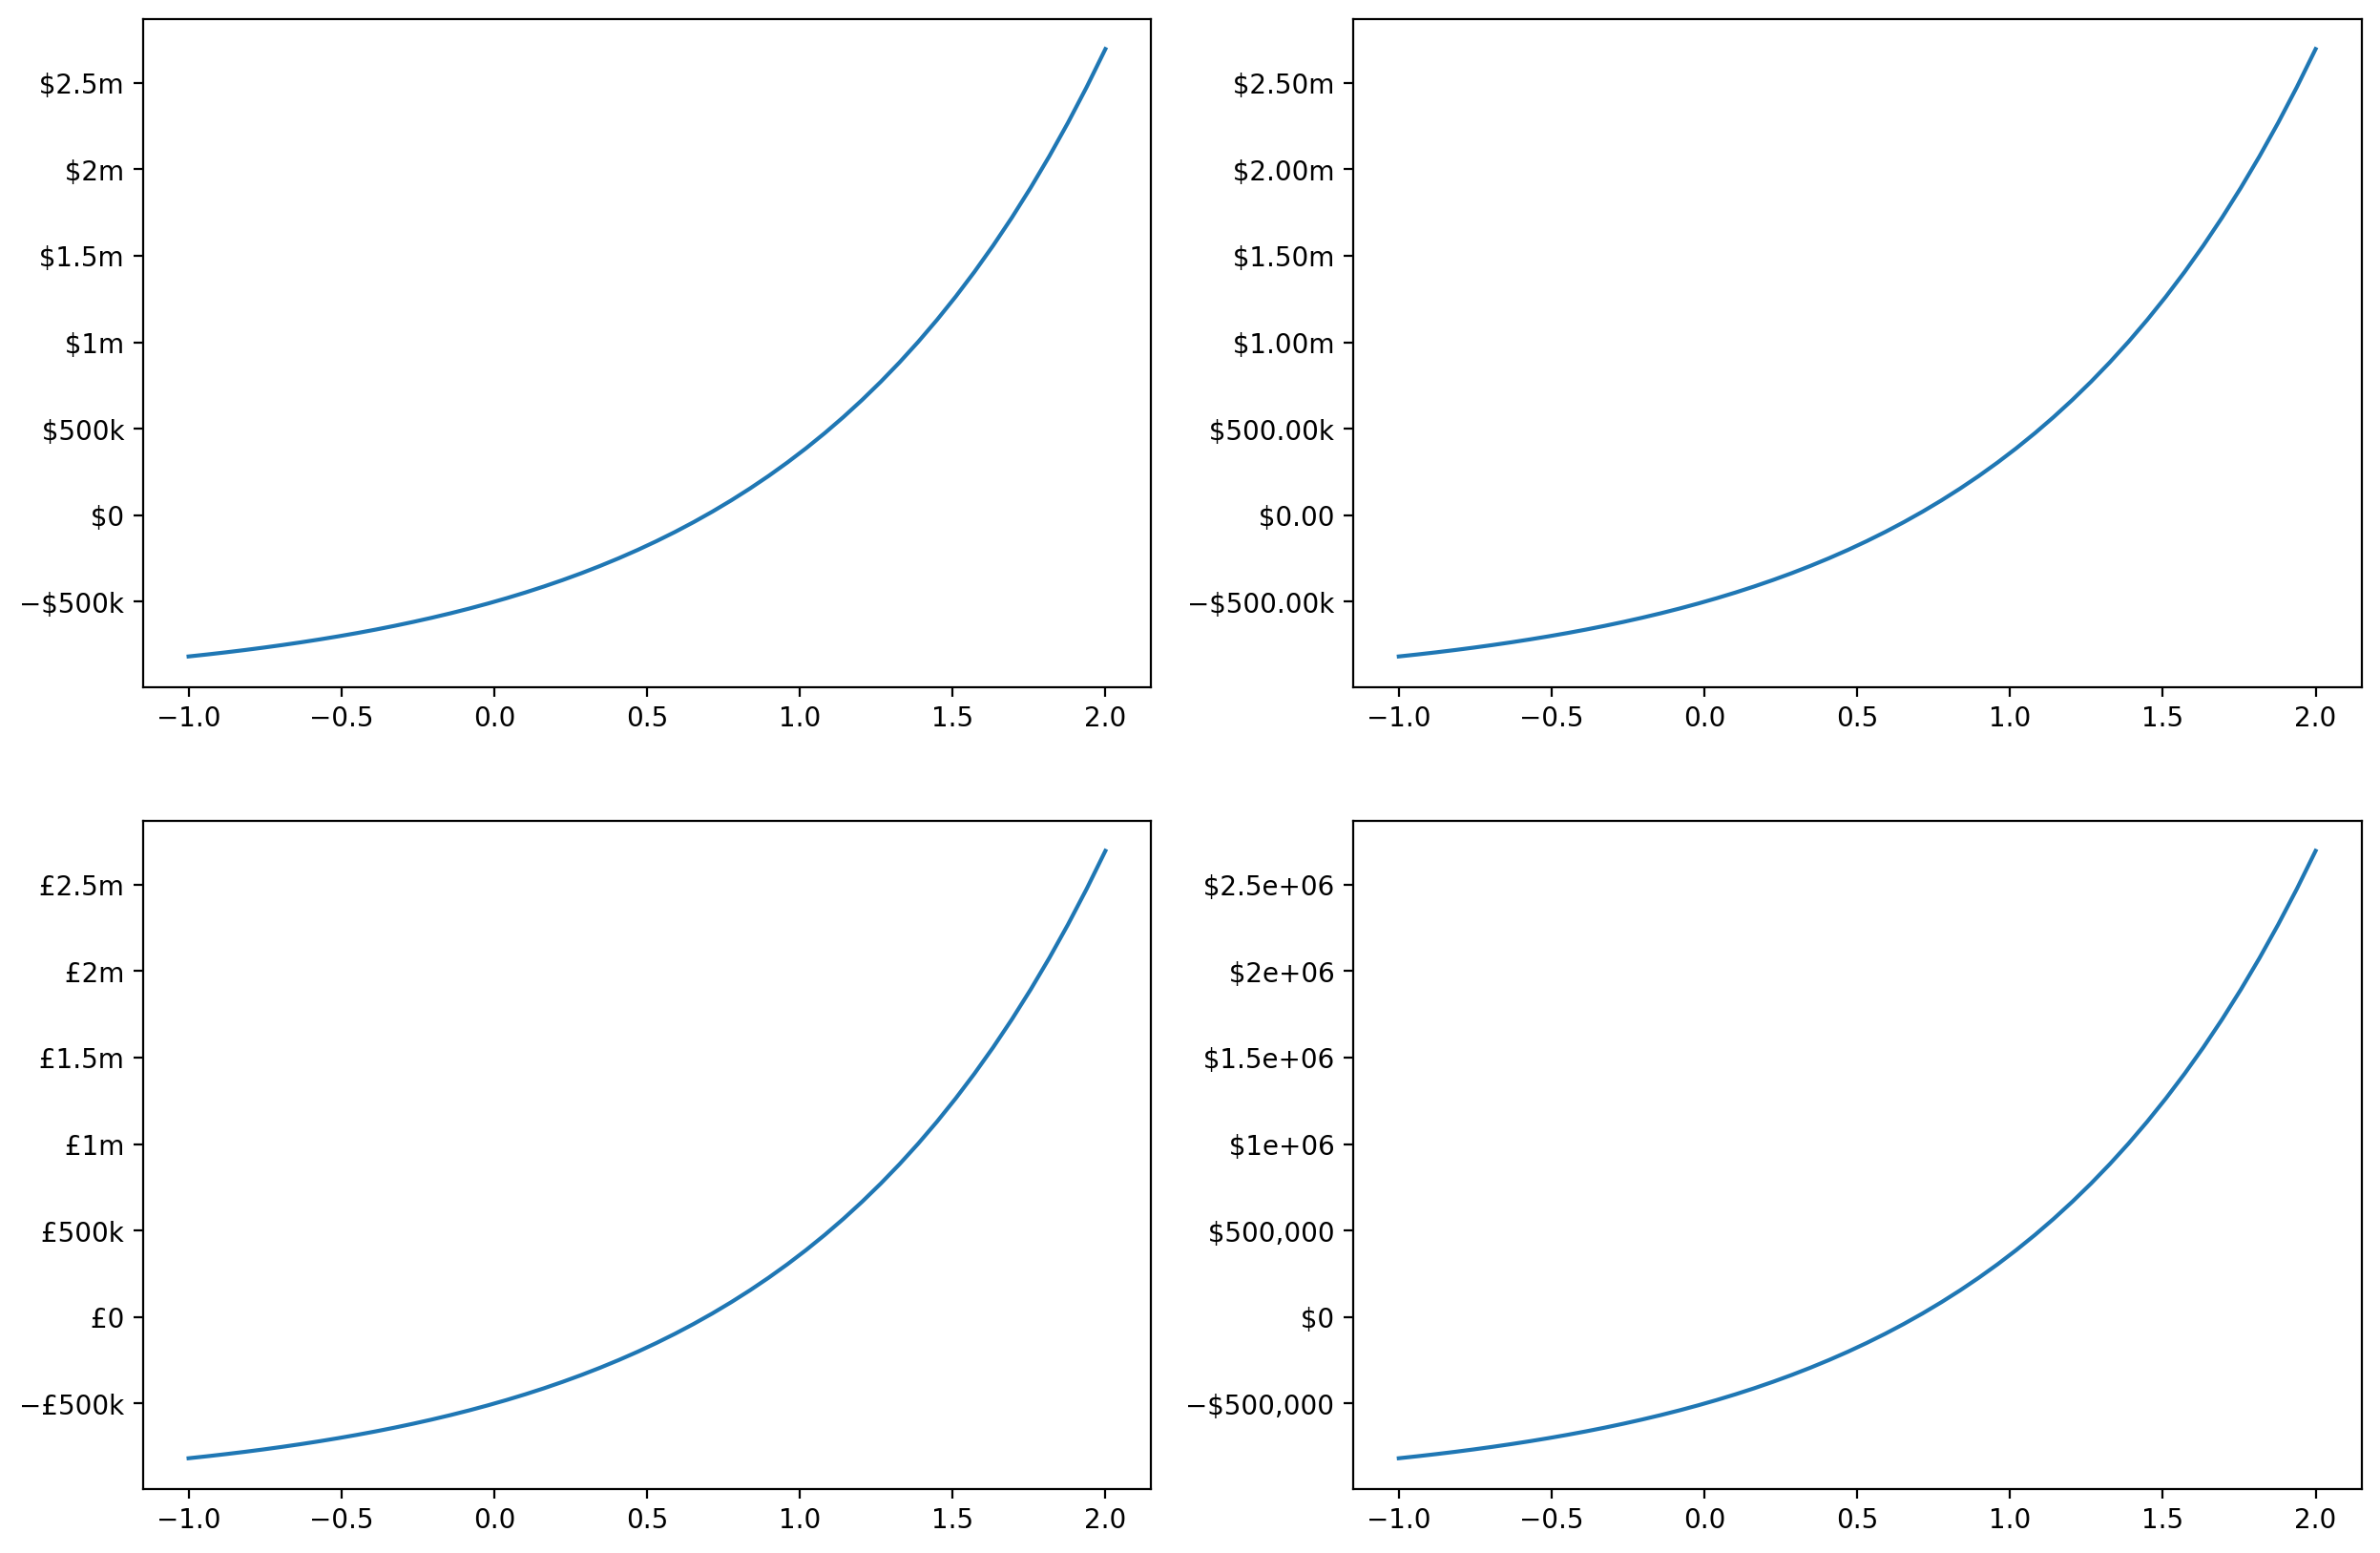

In [13]:
x = np.linspace(-1, 2)
y = 5e5 * (np.exp(x) - 2)

formatters = [
    CurrencyFormatter(),
    CurrencyFormatter(decimals=2),
    CurrencyFormatter(symbol='£'),
    CurrencyFormatter(human_readable=False),
]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, formatter in zip(fig.axes, formatters):
    ax.plot(x, y)
    ax.yaxis.set_major_formatter(formatter)
plt.show()